In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# import modules needed
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Handle the memory growth issues
devices = tf.config.list_physical_devices("GPU")
devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.experimental.set_memory_growth(devices[0], True)

In [7]:
# Read the classes from the data dir
data = tf.keras.preprocessing.image_dataset_from_directory('/data/')

Found 5631 files belonging to 4 classes.


In [8]:
# All Geo Location classes

class_names = data.class_names
class_names

['cloudy', 'desert', 'green_area', 'water']

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next() #batch have 2 things in tuple data and label

In [11]:
batch[0].shape

(32, 256, 256, 3)

In [12]:
batch[1]


#Class - 0 => cloudy
#Class - 1 => desert
#Class - 2 => green_area
#Class - 3 => water

array([3, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 3, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 2, 2, 3, 0, 1, 3, 1, 0, 2], dtype=int32)

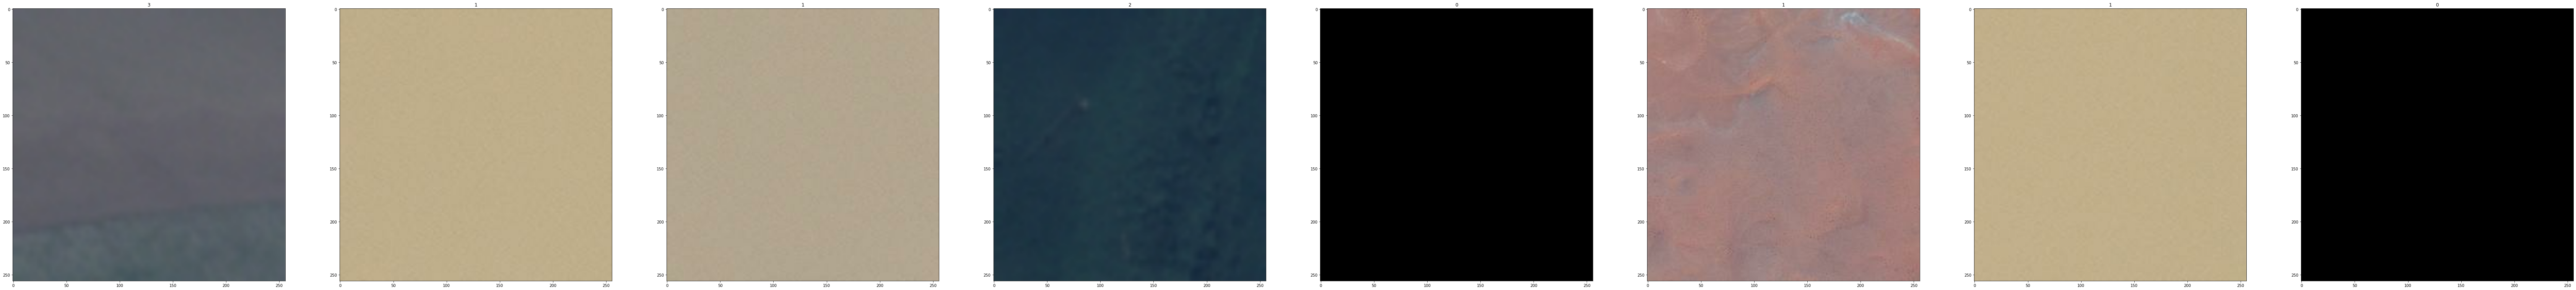

In [13]:
fig, ax = plt.subplots(ncols=8, figsize=(120,120))

for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [61]:
# Preprocessing data

data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.6509804 , 0.57254905, 0.54509807],
          [0.64705884, 0.5686275 , 0.5411765 ],
          [0.654902  , 0.5568628 , 0.5372549 ],
          ...,
          [0.63529414, 0.5176471 , 0.5176471 ],
          [0.63529414, 0.5176471 , 0.5176471 ],
          [0.63529414, 0.5176471 , 0.5176471 ]],
 
         [[0.6509804 , 0.57254905, 0.54509807],
          [0.6509804 , 0.57254905, 0.54509807],
          [0.65882355, 0.56078434, 0.5411765 ],
          ...,
          [0.6313726 , 0.5137255 , 0.5137255 ],
          [0.6313726 , 0.5137255 , 0.5137255 ],
          [0.6313726 , 0.5137255 , 0.5137255 ]],
 
         [[0.6509804 , 0.57254905, 0.54509807],
          [0.6509804 , 0.57254905, 0.54509807],
          [0.65882355, 0.56078434, 0.5411765 ],
          ...,
          [0.627451  , 0.50980395, 0.50980395],
          [0.627451  , 0.50980395, 0.50980395],
          [0.627451  , 0.50980395, 0.50980395]],
 
         ...,
 
         [[0.68235296, 0.5529412 , 0.5176471 ],
          [0.68235

In [16]:
# taing and test data split

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
# Build Deep learning Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
for image, label in train.take(1):
    print (label.shape)

(32,)


In [22]:
model = Sequential()
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [23]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [25]:
# training the Network with train set
history = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
123/123 [==============================] - 125s 993ms/step - loss: 0.3948 - accuracy: 0.8219 - val_loss: 0.3331 - val_accuracy: 0.8330
Epoch 2/15
123/123 [==============================] - 20s 160ms/step - loss: 0.2404 - accuracy: 0.8902 - val_loss: 0.3142 - val_accuracy: 0.8268
Epoch 3/15
123/123 [==============================] - 20s 160ms/step - loss: 0.2650 - accuracy: 0.8905 - val_loss: 0.2452 - val_accuracy: 0.8804
Epoch 4/15
123/123 [==============================] - 20s 162ms/step - loss: 0.2198 - accuracy: 0.9073 - val_loss: 0.2037 - val_accuracy: 0.9089
Epoch 5/15
123/123 [==============================] - 21s 164ms/step - loss: 0.1945 - accuracy: 0.9177 - val_loss: 0.2094 - val_accuracy: 0.9062
Epoch 6/15
123/123 [==============================] - 20s 161ms/step - loss: 0.2654 - accuracy: 0.8984 - val_loss: 0.4060 - val_accuracy: 0.8679
Epoch 7/15
123/123 [==============================] - 20s 160ms/step - loss: 0.2230 - accuracy: 0.9019 - val_loss: 0.1601 - val_a

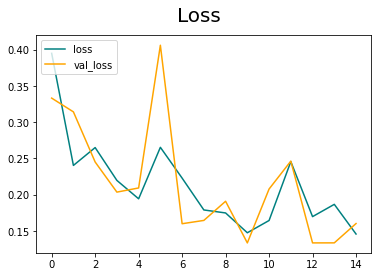

In [26]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

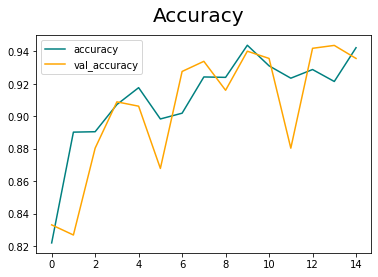

In [27]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
import numpy as np

In [47]:
img = '/data/water/SeaLake_1.jpg'
img = tf.keras.preprocessing.image.load_img(
    img, target_size=(256, 256)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array/225
img_array = tf.expand_dims(img_array, 0) # Create a batch

classes = model.predict(img_array)
max_index = np.where(classes[0] == np.max(classes[0]))

print("This image belongs to class: ", class_names[max_index[0][0]])

This image belongs to class:  water


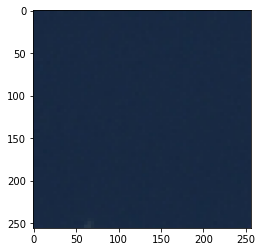

In [48]:
plt.imshow(img)

In [57]:
img = '/data/desert/desert(4).jpg'
img = tf.keras.preprocessing.image.load_img(
    img, target_size=(256, 256)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array/225
img_array = tf.expand_dims(img_array, 0) # Create a batch
classes = model.predict(img_array)
max_index = np.where(classes[0] == np.max(classes[0]))
print("This image belongs to class: ", class_names[max_index[0][0]])

This image belongs to class:  desert


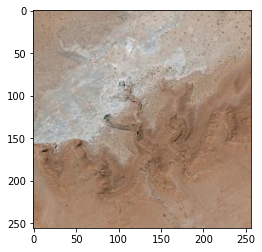

In [58]:
plt.imshow(img)

In [59]:
img = '/data/green_area/Forest_7.jpg'
img = tf.keras.preprocessing.image.load_img(
    img, target_size=(256, 256)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
# img_array = img_array/225
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array = img_array/225
classes = model.predict(img_array)

max_index = np.where(classes[0] == np.max(classes[0]))
print("This image belongs to class: ", class_names[max_index[0][0]])

This image belongs to class:  green_area


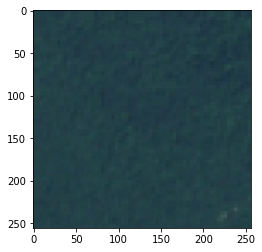

In [60]:
plt.imshow(img)